## CONVOLUTION & POOLING OPERATION

In [1]:
from PIL import Image, ImageOps, ImageChops # pillow library for standard image processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
image_path = r"C:\Users\think\OneDrive - Thinking Mojo\TSLC\Intellipaat\Session Master\05. AI and DL IITR-15Mar2025(M)\cat.jpg"
img = Image.open(image_path)

In [3]:
import os
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\05. AI and DL IITR-15Mar2025(M)'

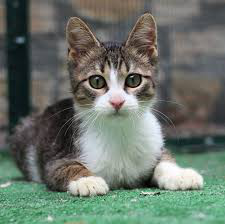

In [5]:
img

In [8]:
### To get the size of the CAT's image
width, height = img.size
print('Width of the image:', width, 'px')
print('Height of the image:', height, 'px')

Width of the image: 225 px
Height of the image: 224 px


In [9]:
### Convert the CAT's image into 200 X 200 pixels
img_resized = img.resize((200, 200))
width1, height1 = img_resized.size
print('Width of the resized image:', width1, 'px')
print('Height of the resized image:', height1, 'px')

Width of the resized image: 200 px
Height of the resized image: 200 px


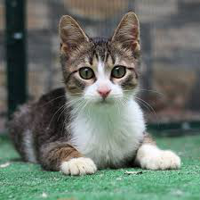

In [10]:
img_resized

### `ORIGINAl IMAGE TO GRAYSCALE STEP`

In [12]:
import cv2 # in case you dont have it ..pls install

In [13]:
### Convert it into `numpy` array
cat_img_np = np.array(img_resized)

In [14]:
cat_img_np

array([[[100,  99,  94],
        [ 93,  94,  89],
        [ 85,  87,  85],
        ...,
        [ 97,  95,  96],
        [ 97,  95,  96],
        [102,  98,  94]],

       [[100,  99,  94],
        [ 93,  94,  89],
        [ 84,  87,  82],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 96,  91,  88]],

       [[102, 100,  95],
        [ 95,  94,  89],
        [ 85,  87,  82],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 84,  81,  78]],

       ...,

       [[ 97, 168, 121],
        [ 93, 161, 117],
        [ 82, 151, 106],
        ...,
        [ 89, 159, 115],
        [ 91, 161, 116],
        [101, 164, 129]],

       [[ 82, 154, 106],
        [ 79, 150, 103],
        [ 69, 138,  93],
        ...,
        [ 83, 152, 107],
        [ 85, 155, 109],
        [ 97, 159, 124]],

       [[ 63, 135,  87],
        [ 67, 140,  91],
        [ 69, 139,  93],
        ...,
        [ 84, 153, 107],
        [ 86, 156, 108],
        [ 97, 159, 124]]

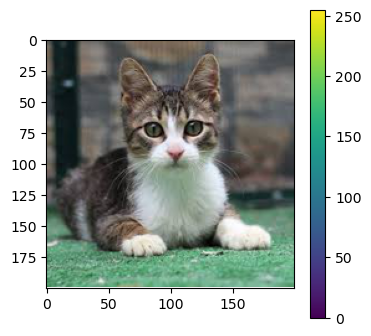

In [21]:
### Original cat's color image
plt.figure(figsize=(4,4))
plt.imshow(img_resized)
plt.colorbar()
plt.show()

In [18]:
gray_cat = cv2.cvtColor(cat_img_np, cv2.COLOR_RGB2GRAY)

In [24]:
gray_cat.shape

(200, 200)

In [25]:
gray_cat.ndim

2

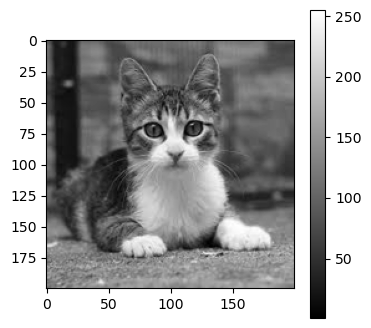

In [23]:
### Grayscale cat
plt.figure(figsize=(4,4))
plt.imshow(gray_cat, cmap='gray')
plt.colorbar()
plt.show()

### `CONVOLUTION STEP`

In [27]:
filters = {
    'Original': gray_cat,
    'Sobel X': cv2.Sobel(gray_cat, cv2.CV_64F, 1, 0, ksize=3),
    'Sobel Y': cv2.Sobel(gray_cat, cv2.CV_64F, 0, 1, ksize=3),
    'Laplacian': cv2.Laplacian(gray_cat, cv2.CV_64F),
    'Sharpen': cv2.filter2D(gray_cat, -1, kernel= np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])),
    'Gaussian Blur': cv2.GaussianBlur(gray_cat, (5,5), 0)
}
    

### Plot the results of the above filters

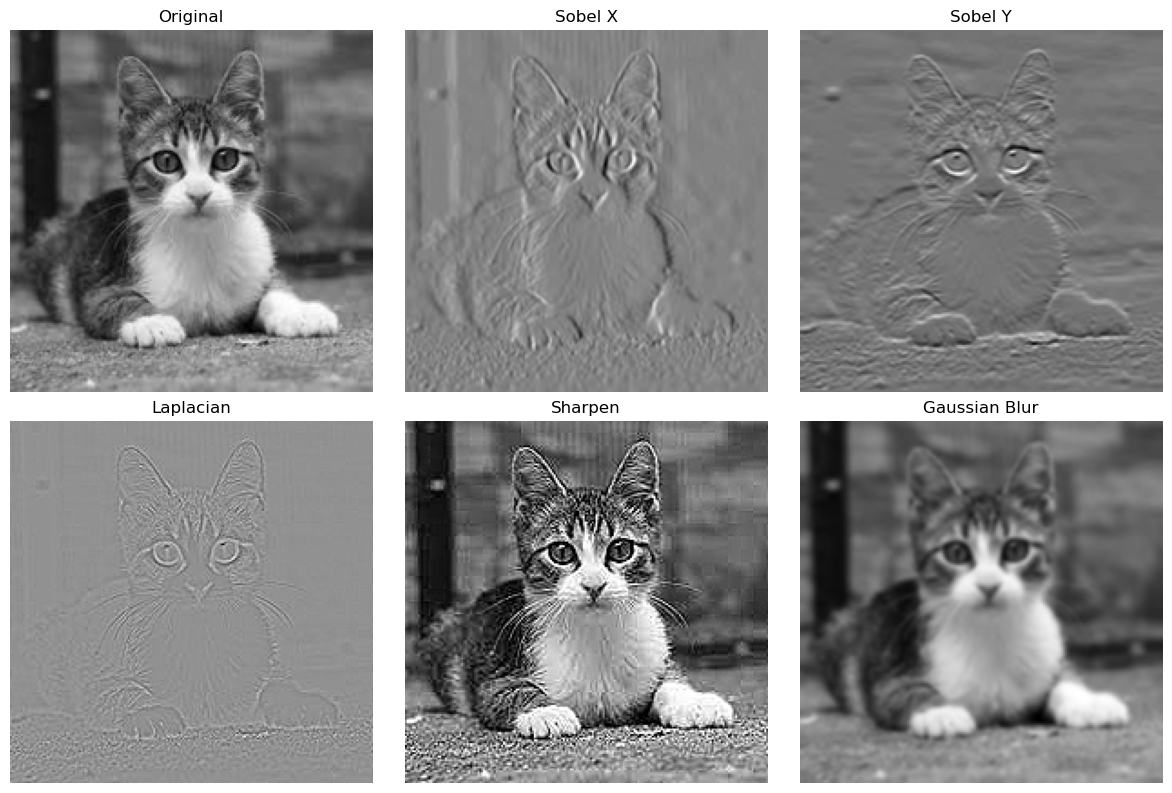

In [29]:
plt.figure(figsize = (12,8))

for i, (title, img) in enumerate(filters.items(), 1):
    plt.subplot(2,3,i)
    cmap = 'gray' if len(img.shape) ==2 else None
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

### SOBEL Filter Doc Link - https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html

## ADD A BLOCK FOR `POOLING LAYER` EXTENDING THIS CODE